<a href="https://colab.research.google.com/github/AtulAravindDas/EverythingFootball/blob/main/notebooks/Expected_Goals_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplsoccer

# **Dataset loading and preliminary analysis**

In [ ]:
from google.colab import files
file=files.upload()


Saving xg_model.csv to xg_model.csv


In [ ]:
df=pd.read_csv('xg_model.csv')
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(8118, 25)

In [ ]:
df.x.max(),df.x.min()

(99.6, 0.8)

In [ ]:
df.y.max(),df.y.min()

(99.6, 3.1)

In [ ]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

# **Data Cleaning**

In [ ]:
df.drop(['DirectFreekick','DirectCorner'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [ ]:
df.OwnGoal.value_counts()

,count
OwnGoal,
True,27


In [ ]:
df=df[df['OwnGoal']!=True]
df.drop('OwnGoal',axis=1,inplace=True)
df

/tmp/ipython-input-18-1562057705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('OwnGoal',axis=1,inplace=True)


,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Head,BigChance,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,OtherBodyPart
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,86.4,34.0,False,FirstHalf,NaN,Center,NaN,True,NaN,True,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8114,92.4,51.0,False,FirstHalf,True,Center,NaN,True,NaN,NaN,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8115,88.6,37.8,False,FirstHalf,True,Center,NaN,True,NaN,True,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
8116,89.6,48.1,False,FirstHalf,True,Center,NaN,True,NaN,NaN,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.is_goal.value_counts()

,count
is_goal,
False,7097
True,994


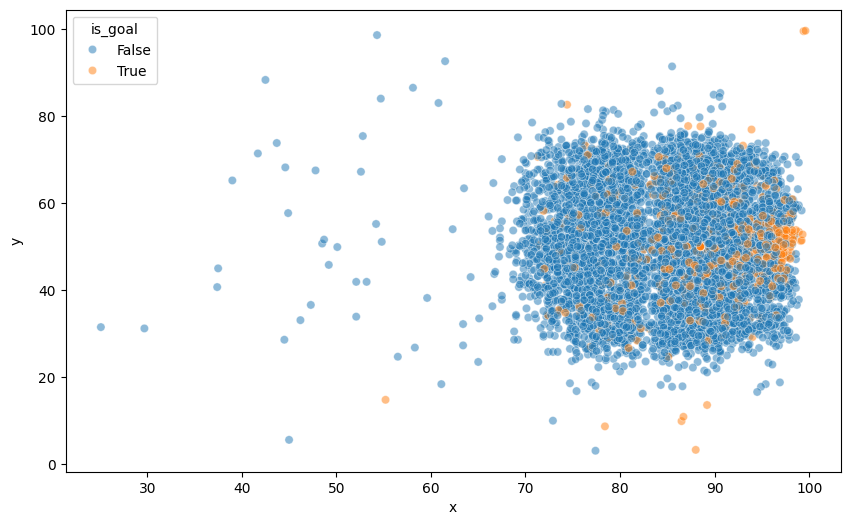

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='x',y='y',data=df,hue='is_goal',alpha=0.5)
plt.show()

In [ ]:
df.isna().sum()

,0
x,0
y,0
is_goal,0
period,0
Assisted,2053
Zone,0
IndividualPlay,5289
RegularPlay,2714
LeftFoot,5307
RightFoot,4106


In [ ]:
df.fillna(0,inplace=True)# The null values represent the number of shots failed. So replace them with zero

/tmp/ipython-input-22-946627430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0,inplace=True)# The null values represent the number of shots failed. So replace them with zero


In [ ]:
df.dtypes

,0
x,float64
y,float64
is_goal,bool
period,object
Assisted,object
Zone,object
IndividualPlay,object
RegularPlay,object
LeftFoot,object
RightFoot,object


In [ ]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool,
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool,
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [ ]:
df.dtypes


,0
x,float64
y,float64
is_goal,bool
period,object
Assisted,bool
Zone,object
IndividualPlay,bool
RegularPlay,bool
LeftFoot,bool
RightFoot,bool


# **Feature Engineering**

In [ ]:
df['shot_distance']= np.sqrt((df['x']-100)**2+(df['y']-50)**2) #THe goal lies to the right and in the middle

In [ ]:
df.shot_distance

,shot_distance
0,19.266551
1,33.077636
2,22.141590
3,11.636151
4,16.323296
...,...
8113,20.999048
8114,7.665507
8115,16.697305
8116,10.572133


<Axes: >

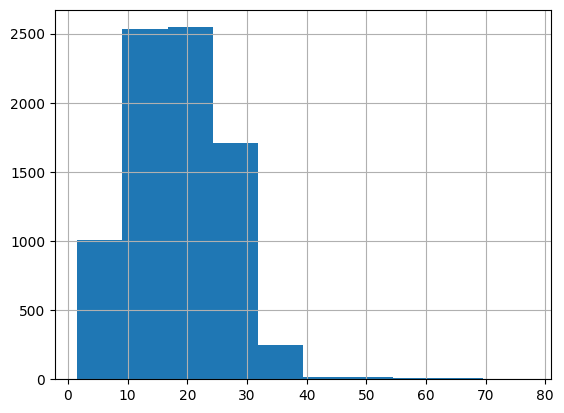

In [ ]:
df.shot_distance.hist()

In [ ]:
df.shot_distance.describe()

,shot_distance
count,8091.000000
mean,18.495064
std,8.011289
min,1.581139
25%,12.061300
50%,18.380696
75%,24.200207
max,77.150891


In [ ]:
 df.period.value_counts()

,count
period,
SecondHalf,4333
FirstHalf,3758


In [ ]:
df=pd.get_dummies(df,columns=['period','Zone'])#Period is a metric representing the half they scored in and zone represents the location
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [ ]:
df.period_FirstHalf#Checks if the goal was scored in first half or not

,period_FirstHalf
0,False
1,False
2,False
3,False
4,False
...,...
8113,True
8114,True
8115,True
8116,True


In [ ]:
df.period_FirstHalf.value_counts()

,count
period_FirstHalf,
False,4333
True,3758


In [ ]:
df.period_SecondHalf.value_counts()

,count
period_SecondHalf,
True,4333
False,3758


# **Expected Goals Model creation(using Logistic Regression)**


Objective: Predict if it is a goal or not and the probability of it becoming a goal

In [ ]:
x=df.drop('is_goal',axis=1)
y=df['is_goal']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,roc_auc_score,brier_score_loss

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_proba=model.predict_proba(X_test)[:,1] #Predict the probability of the goals
y_pred_proba[:10]

array([0.07316349, 0.35086697, 0.03638619, 0.03778513, 0.10020373,
       0.03810524, 0.03488027, 0.04860192, 0.04599387, 0.03884171])

In [ ]:
final_df=X_test.copy()
final_df['Goal_Probability']=y_pred_proba
final_df.head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,Goal_Probability
4208,87.0,56.4,True,False,True,False,True,False,True,False,...,False,False,14.489997,False,True,False,True,False,False,0.073163
4180,97.9,52.8,True,False,True,False,False,False,True,True,...,False,False,3.500000,False,True,False,True,False,False,0.350867
1933,97.0,41.9,True,False,False,False,False,True,True,True,...,False,False,8.637708,True,False,False,True,False,False,0.036386
1063,73.1,37.4,True,True,True,True,False,False,False,False,...,False,False,29.704713,True,False,False,True,False,False,0.037785
737,82.7,54.0,True,True,True,False,True,False,False,False,...,False,False,17.756407,False,True,False,True,False,False,0.100204


In [ ]:
final_df.iloc[750]

,2039
x,75.9
y,46.9
Assisted,True
IndividualPlay,True
RegularPlay,True
LeftFoot,True
RightFoot,False
FromCorner,False
FirstTouch,False
Head,False


In [ ]:
final_df.iloc[100]

,7880
x,97.0
y,42.2
Assisted,True
IndividualPlay,False
RegularPlay,True
LeftFoot,False
RightFoot,True
FromCorner,False
FirstTouch,True
Head,False


In [ ]:
final_df.sort_values(by='Goal_Probability',ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,Goal_Probability
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.841312
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.841312
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.841312
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.841312
695,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,True,False,False,True,False,False,0.838067


In [ ]:
logloss=log_loss(y_test,y_pred_proba) #How good the model predicts the probability of classes
logloss

0.26947676439820983

In [ ]:
roc_auc_score=roc_auc_score(y_test,y_pred_proba) #Area under the curve of the ROC curve(evaluates how well the model separates the classes)
roc_auc_score

np.float64(0.8109528859263748)

In [ ]:
brier_score_loss=brier_score_loss(y_test,y_pred_proba) #The lower the better
brier_score_loss

np.float64(0.0772776879725815)

Plot the xG in the Pitch

In [ ]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors=['red','yellow','green']
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)


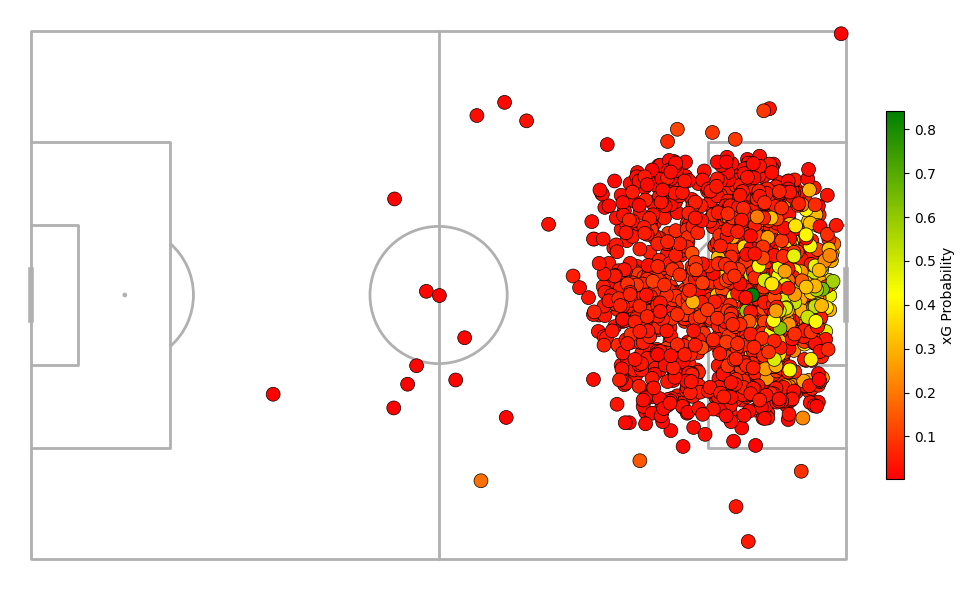

In [ ]:
fig,ax=pitch.draw(figsize=(10,6))
sc=pitch.scatter(final_df['x'],
                 final_df['y'],
                 c=final_df['Goal_Probability'],
                 cmap=cmap,
                 edgecolors='black', linewidth=0.5, s=100,
                 ax=ax)

cbar=plt.colorbar(sc,ax=ax,orientation='vertical',fraction=0.02,pad=0.02)
cbar.set_label('xG Probability')
plt.show()